# NEWS notebook 3 Modelling CountVectorizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data cleaning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, normalize, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
 
# modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve
 
# machine learning
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier


In [2]:
# load the data
data = pd.read_csv("C:/Users/Meyke/Documents/news.csv/newsExtended2.csv", index_col='Unnamed: 0')

In [3]:
data['transcript'] = data['transcript'].fillna("")

In [4]:
vector = CountVectorizer()
x = vector.fit_transform(data['transcript'])

In [143]:
x.max()

6

In [144]:
type(x)

scipy.sparse.csr.csr_matrix

In [146]:
x.shape

(281876, 38961)

In [135]:
x_normalize = normalize(x, norm='l1', axis=0)

In [147]:
x_normalize.shape

(281876, 38961)

In [148]:
x_normalize.max()

1.0

In [149]:
x_normalize.min()

0.0

In [136]:
y = data['CATEGORY']

In [106]:
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [137]:
# Create training and test sets
xN_train, xN_test, y_train, y_test = train_test_split(x_normalize, y, test_size = 0.3, random_state=42)

In [7]:
# Try bunch of models for first impression
models=[LogisticRegression(max_iter = 100000,  random_state=42),
        KNeighborsClassifier(n_neighbors = 4),
        DecisionTreeClassifier( random_state=42),
        RandomForestClassifier( random_state=42),
        XGBClassifier( random_state=42),
        BaggingClassifier( random_state=42), 
        AdaBoostClassifier( random_state=42),
        GradientBoostingClassifier( random_state=42),
        MultinomialNB()]
 
names =['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier','Multinomial NaiveBayes']
       
train_accuracy=[]
test_accuracy=[]
train_f1=[]
test_f1=[]
train_auc = []
test_auc = []
 
 
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    
    # y_pred
    test_pred=clf.predict(x_test)
    train_pred=clf.predict(x_train) 
    
    # y_proba
    y_pred_proba_train = clf.predict_proba(x_train)
    y_pred_proba_test = clf.predict_proba(x_test)
    
    # accuracy
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))
    
    # f1
    train_f1.append(f1_score(y_train, train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, test_pred, average='weighted'))
    
    # auc
    train_auc.append(roc_auc_score(y_train, y_pred_proba_train, multi_class='ovo'))
    test_auc.append(roc_auc_score(y_test, y_pred_proba_test, multi_class='ovo'))
   
d= {'Model':names,'Train accuracy':train_accuracy, 'Test accuracy':test_accuracy, 'Train auc ':train_auc, 'Test auc':test_auc, 'Train f1':train_f1, 'Test f1': test_f1}   
score_df = pd.DataFrame(d)
score_df

C:\Users\Meyke\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Train accuracy,Test accuracy,Train auc,Test auc,Train f1,Test f1
0,Logistic Regression,0.964797,0.938543,0.996902,0.992097,0.964795,0.938487
1,KNN Classifier,0.910315,0.842484,0.988327,0.946411,0.909799,0.841199
2,Decision Tree Classifier,0.997512,0.899755,0.999994,0.930327,0.997512,0.899751
3,Random Forest Classifier,0.997506,0.927758,0.999957,0.989199,0.997506,0.927603
4,XGB Classifier,0.851170,0.846067,0.973036,0.969690,0.850019,0.844639
5,Bagging Classifier,0.989033,0.904994,0.999803,0.969671,0.989032,0.904886
6,AdaBoost Classifier,0.606377,0.604709,0.724252,0.721668,0.577564,0.575949
7,Gradient Boosting Classifier,0.743691,0.741033,0.925484,0.922727,0.739196,0.736193
8,Multinomial NaiveBayes,0.931216,0.920426,0.991265,0.988536,0.931283,0.920476


### Logistic Regression

##### Tuning the model

In [5]:
y = data['CATEGORY']

In [91]:
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [66]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.942504 using {'C': 10, 'solver': 'liblinear'}


In [92]:
le = LabelEncoder()

In [93]:
y = le.fit_transform(data['CATEGORY'])
n_classes = len(set(data['CATEGORY']))
y = label_binarize(y, classes=[*range(n_classes)])

In [94]:
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

##### Build model and plot curves

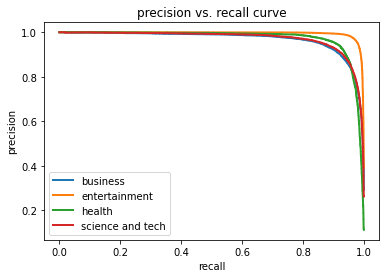

In [97]:
clf = OneVsRestClassifier(LogisticRegression(max_iter = 100000,
                                            C = 10,
                                            solver = 'liblinear'))
clf.fit(x_train, y_train)
test_pred=clf.predict(x_test)
y_pred_proba_test = clf.predict_proba(x_test)

# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred_proba_test[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

labels = ['business', 'entertainment', 'health', 'science and tech']
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best", labels=labels)
plt.title("precision vs. recall curve")
plt.show()

# high precision and high recall for all four classes. But best for entertainment.

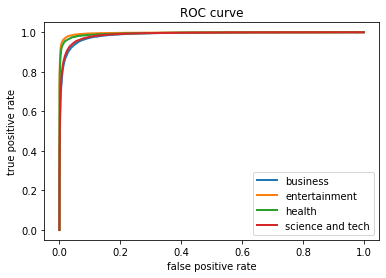

In [96]:
# roc curve
FalsePosRate = dict()
TruePosRate = dict()

for i in range(len(set(data.CATEGORY))):
    FalsePosRate[i], TruePosRate[i], _ = roc_curve(y_test[:, i],
                                  y_pred_proba_test[:, i])
    plt.plot(FalsePosRate[i], TruePosRate[i], lw=2, label='class {}'.format(i))

labels = ['business', 'entertainment', 'health', 'science and tech']
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best", labels=labels)
plt.title("ROC curve")
plt.show()

In [81]:
list(le.inverse_transform([0, 1, 2, 3]))

['b', 'e', 'm', 't']

In [82]:
y_test = np.argmax(y_test, axis=1)

In [83]:
y_pred_proba_test = np.argmax(y_pred_proba_test, axis=1)

In [84]:
test_pred = np.argmax(test_pred, axis=1)

##### Confusion MAtrix

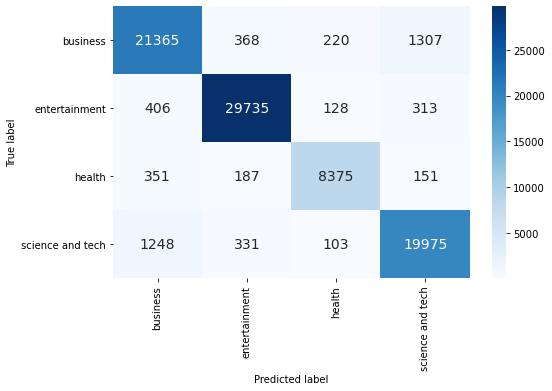

In [85]:
labels = ['business', 'entertainment', 'health', 'science and tech']
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, y_pred_proba_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
plt.show()

# predictions are not bad. But since the classes are a little imbalanced, will also create a normalized confusion matrix

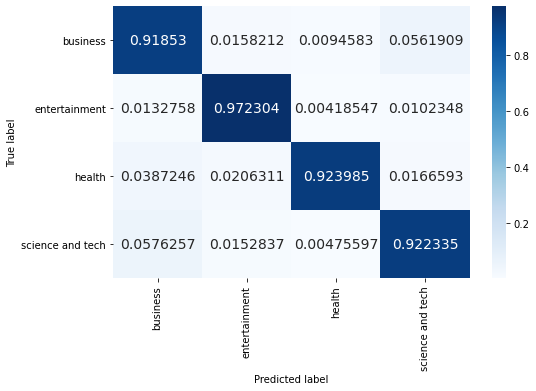

In [86]:
# Normalized confusion matrix
labels = ['business', 'entertainment', 'health', 'science and tech']
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, y_pred_proba_test, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
plt.show()

# entertainment is best predicted. Business vs. Science & tech seems to be confused the most

Possible ways to further improve the model:
- use bi-grams/tri-grams/N-grams
- use TF-IDF
- use BERT sentence embeddings
- further tune (different) models -e.g. deep learning

#### Tuning the model with normalization

In [112]:
y = data['CATEGORY']

In [113]:
# Create training and test sets
xN_train, xN_test, y_train, y_test = train_test_split(x_normalize, y, test_size = 0.3, random_state=42)

In [114]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_normalize, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.942801 using {'C': 10, 'solver': 'liblinear'}


In [115]:
y = le.fit_transform(data['CATEGORY'])
n_classes = len(set(data['CATEGORY']))
y = label_binarize(y, classes=[*range(n_classes)])

In [116]:
# Create training and test sets
xN_train, xN_test, y_train, y_test = train_test_split(x_normalize, y, test_size = 0.3, random_state=42)

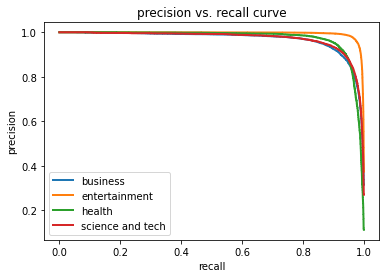

In [117]:
clf = OneVsRestClassifier(LogisticRegression(max_iter = 100000,
                                            C = 10,
                                            solver = 'liblinear'))
clf.fit(xN_train, y_train)
test_pred=clf.predict(xN_test)
y_pred_proba_test = clf.predict_proba(xN_test)

# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred_proba_test[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

labels = ['business', 'entertainment', 'health', 'science and tech']
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best", labels=labels)
plt.title("precision vs. recall curve")
plt.show()

# high precision and high recall for all four classes. But best for entertainment.

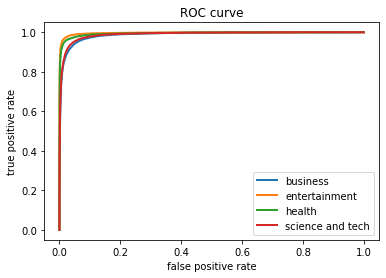

In [118]:
# roc curve
FalsePosRate = dict()
TruePosRate = dict()

for i in range(len(set(data.CATEGORY))):
    FalsePosRate[i], TruePosRate[i], _ = roc_curve(y_test[:, i],
                                  y_pred_proba_test[:, i])
    plt.plot(FalsePosRate[i], TruePosRate[i], lw=2, label='class {}'.format(i))

labels = ['business', 'entertainment', 'health', 'science and tech']
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best", labels=labels)
plt.title("ROC curve")
plt.show()

In [119]:
y_test = np.argmax(y_test, axis=1)

In [120]:
y_pred_proba_test = np.argmax(y_pred_proba_test, axis=1)

In [121]:
test_pred = np.argmax(test_pred, axis=1)

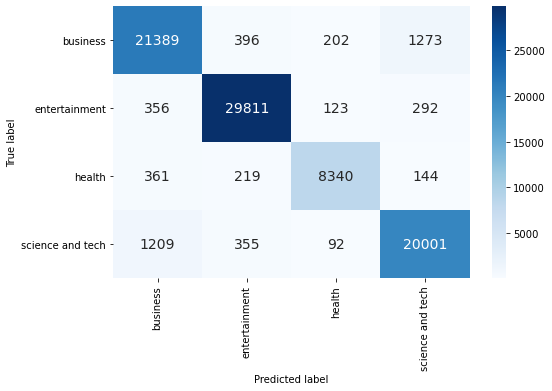

In [122]:
labels = ['business', 'entertainment', 'health', 'science and tech']
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, y_pred_proba_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
plt.show()

# predictions are not bad. But since the classes are a little imbalanced, will also create a normalized confusion matrix

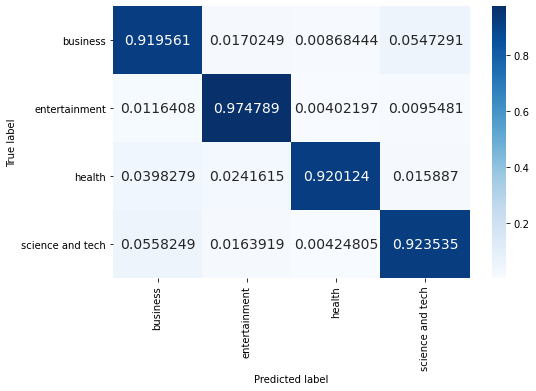

In [123]:
# Normalized confusion matrix
labels = ['business', 'entertainment', 'health', 'science and tech']
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, y_pred_proba_test, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
plt.show()

# entertainment is best predicted. Business vs. Science & tech seems to be confused the most

### KNeighbors

##### Tuning the model

In [6]:
y = data['CATEGORY']

In [7]:
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [ ]:
model = KNeighborsClassifier()
leaf_size = [20,30,40,50]
n_neighbors = list(range(1,10))
p=[1,2]

# define grid search
grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))